In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate

# Importing the data set

In [158]:
df = pd.read_csv('/Users/siddharth/Code/Python/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [159]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploring Churn Distribution

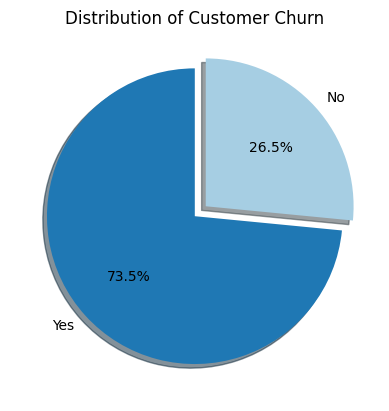

In [160]:
target = df["Churn"].value_counts().to_frame()
target=target.reset_index()
colors = sns.color_palette('Paired')[0:2][::-1]
plt.pie(target['count'], labels=['Yes', 'No'], autopct='%.1f%%', colors=colors, explode=[0,0.1], shadow=True, startangle=90)
plt.title('Distribution of Customer Churn')
plt.show()

Around 3/4 of the customers have left the company in the time frame.

In [229]:
#bar plot function to plot churn rate distribution by categorical feature

def bar_chart(column, df=df):
    plt.figure(figsize=(10, 8))
    cat_df = df.groupby([column, 'Churn']).size().reset_index()
    cat_df=cat_df.rename(columns={0:'Count'})
    
    value_counts_df = df[column].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]

    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    percentage = [round(element / sum(num_list)*100, 1) for element in num_list]

    print(tabulate(cat_df, showindex="never", tablefmt='fancy_grid', headers='keys'))

    sns.barplot(data=cat_df, x=column, y='Count', hue='Churn', palette='Paired')
    plt.title(f'Churn rate distribution by feature - {column} (Count of "{categories[0]}" and "{categories[1]}" is {percentage[0]}% and {percentage[1]}% respectively)')
    plt.show()


## Demographic categories

╒══════════╤═════════╤═════════╕
│ gender   │ Churn   │   Count │
╞══════════╪═════════╪═════════╡
│ Female   │ No      │    2549 │
├──────────┼─────────┼─────────┤
│ Female   │ Yes     │     939 │
├──────────┼─────────┼─────────┤
│ Male     │ No      │    2625 │
├──────────┼─────────┼─────────┤
│ Male     │ Yes     │     930 │
╘══════════╧═════════╧═════════╛


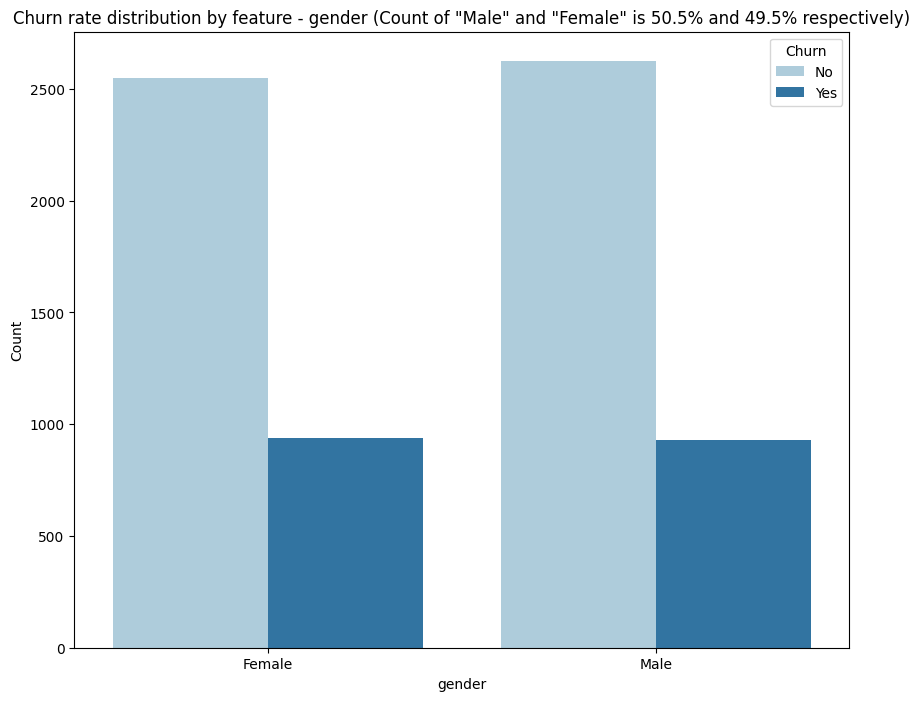

In [230]:
bar_chart('gender')

╒═════════════════╤═════════╤═════════╕
│ SeniorCitizen   │ Churn   │   Count │
╞═════════════════╪═════════╪═════════╡
│ No              │ No      │    4508 │
├─────────────────┼─────────┼─────────┤
│ No              │ Yes     │    1393 │
├─────────────────┼─────────┼─────────┤
│ Yes             │ No      │     666 │
├─────────────────┼─────────┼─────────┤
│ Yes             │ Yes     │     476 │
╘═════════════════╧═════════╧═════════╛


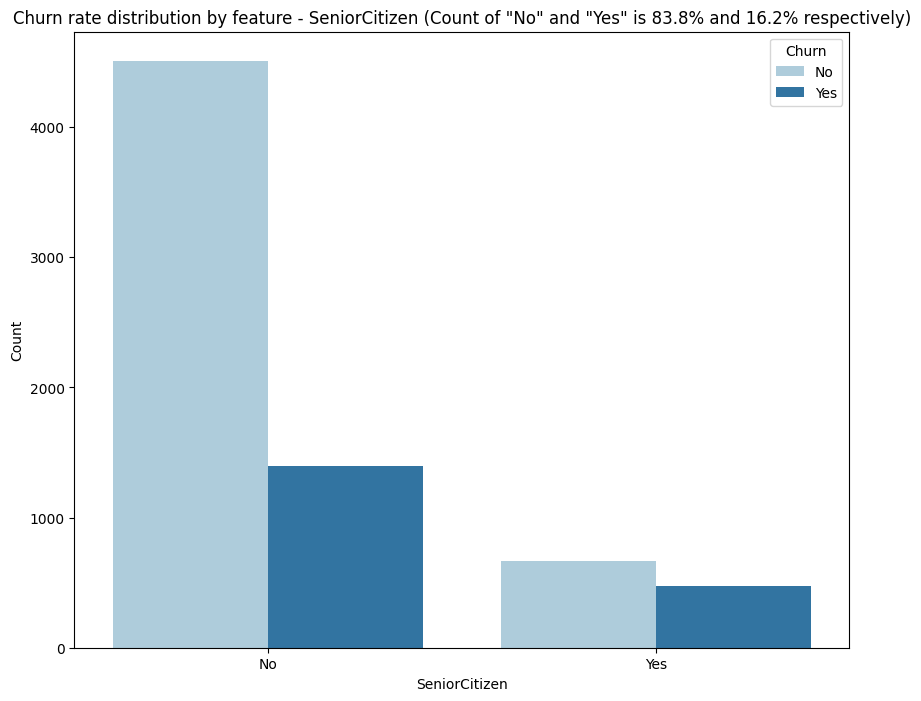

In [231]:
df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No" 
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
bar_chart('SeniorCitizen')

╒══════════════╤═════════╤═════════╕
│ Dependents   │ Churn   │   Count │
╞══════════════╪═════════╪═════════╡
│ No           │ No      │    3390 │
├──────────────┼─────────┼─────────┤
│ No           │ Yes     │    1543 │
├──────────────┼─────────┼─────────┤
│ Yes          │ No      │    1784 │
├──────────────┼─────────┼─────────┤
│ Yes          │ Yes     │     326 │
╘══════════════╧═════════╧═════════╛


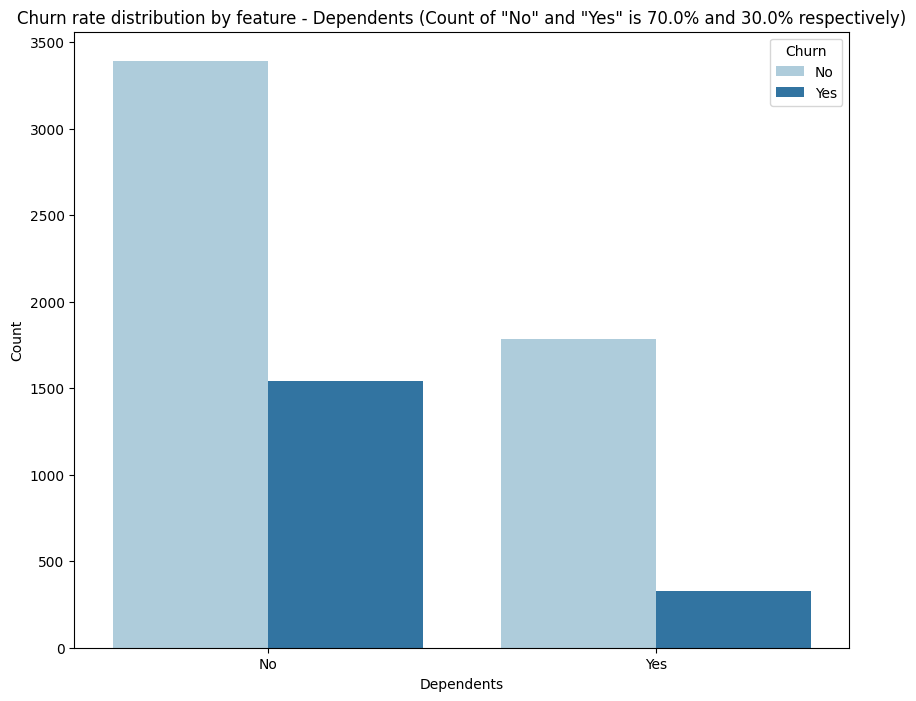

In [232]:
bar_chart('Dependents')

╒═══════════╤═════════╤═════════╕
│ Partner   │ Churn   │   Count │
╞═══════════╪═════════╪═════════╡
│ No        │ No      │    2441 │
├───────────┼─────────┼─────────┤
│ No        │ Yes     │    1200 │
├───────────┼─────────┼─────────┤
│ Yes       │ No      │    2733 │
├───────────┼─────────┼─────────┤
│ Yes       │ Yes     │     669 │
╘═══════════╧═════════╧═════════╛


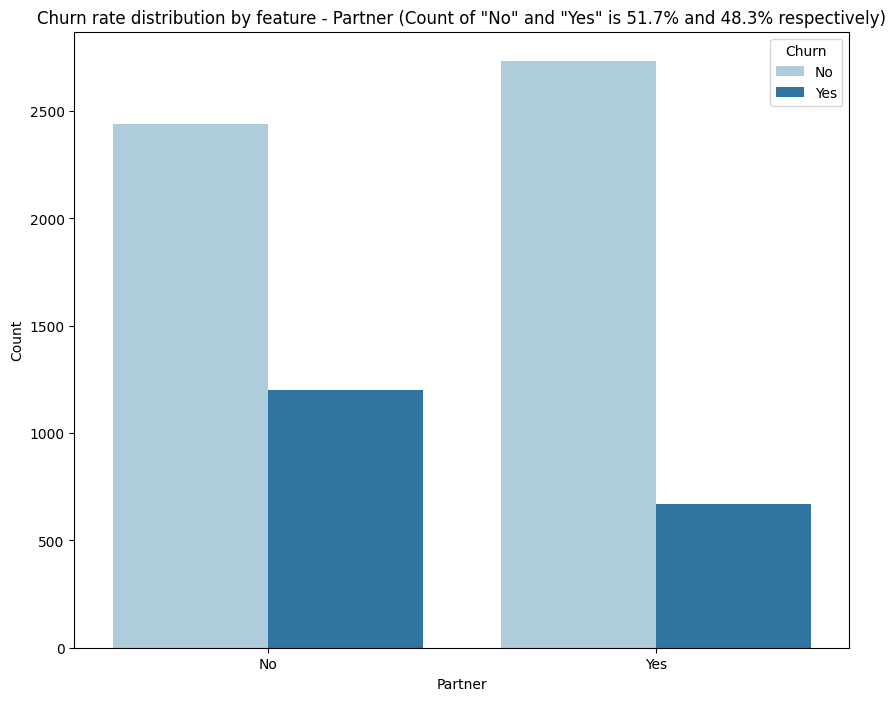

In [233]:
bar_chart('Partner')

## Demographic insights:
* Churn rate in females is slightly higher, but this is negligible.
* Younger customers (not senior citizens) have a higher churn rate than senior citizens.
* Customers with no dependent family members have a higher churn rate than customers with dependents. This observation is similar with customers having no partner. 

### The critical demographic section is **young customers with no partners and no dependents**. This group of customers is the most likely to churn.

## Services opted by customer

╒════════════════╤═════════╤═════════╕
│ PhoneService   │ Churn   │   Count │
╞════════════════╪═════════╪═════════╡
│ No             │ No      │     512 │
├────────────────┼─────────┼─────────┤
│ No             │ Yes     │     170 │
├────────────────┼─────────┼─────────┤
│ Yes            │ No      │    4662 │
├────────────────┼─────────┼─────────┤
│ Yes            │ Yes     │    1699 │
╘════════════════╧═════════╧═════════╛


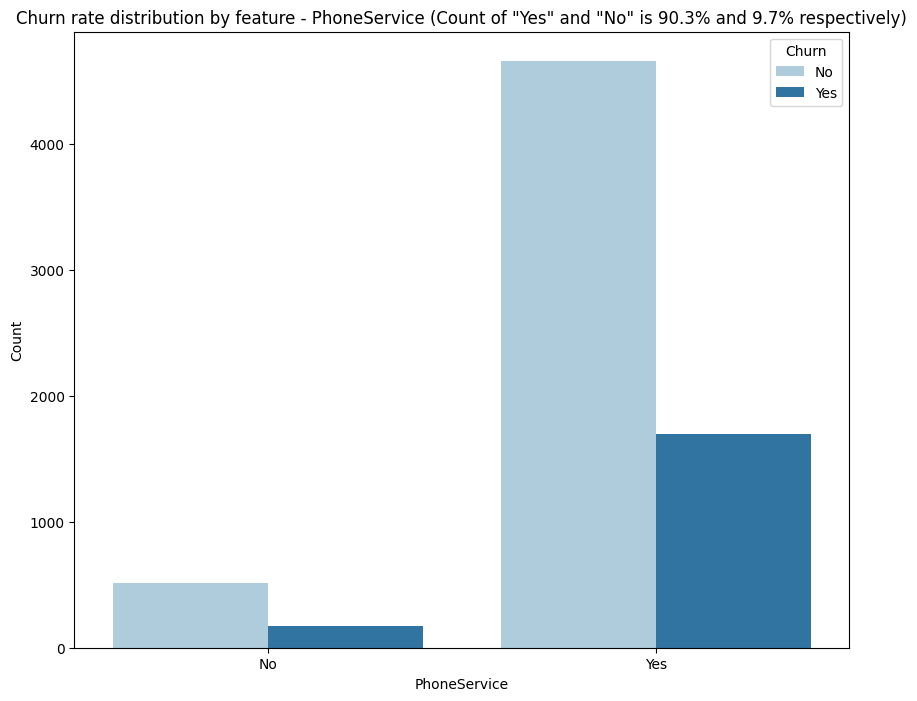

In [234]:
bar_chart('PhoneService')

╒══════════════════╤═════════╤═════════╕
│ MultipleLines    │ Churn   │   Count │
╞══════════════════╪═════════╪═════════╡
│ No               │ No      │    2541 │
├──────────────────┼─────────┼─────────┤
│ No               │ Yes     │     849 │
├──────────────────┼─────────┼─────────┤
│ No phone service │ No      │     512 │
├──────────────────┼─────────┼─────────┤
│ No phone service │ Yes     │     170 │
├──────────────────┼─────────┼─────────┤
│ Yes              │ No      │    2121 │
├──────────────────┼─────────┼─────────┤
│ Yes              │ Yes     │     850 │
╘══════════════════╧═════════╧═════════╛


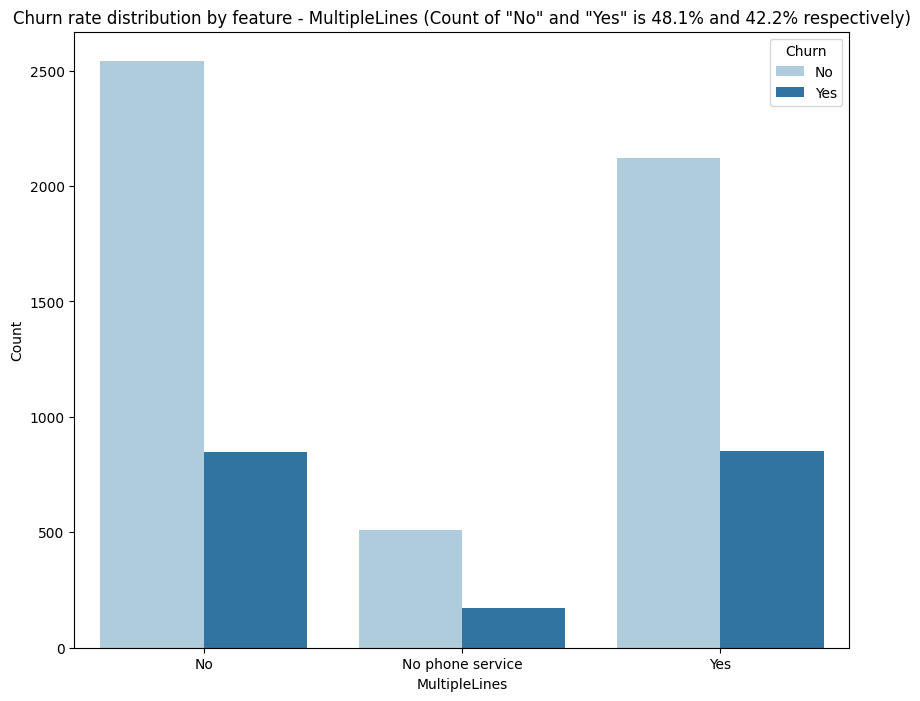

In [235]:
bar_chart('MultipleLines')

╒═══════════════════╤═════════╤═════════╕
│ InternetService   │ Churn   │   Count │
╞═══════════════════╪═════════╪═════════╡
│ DSL               │ No      │    1962 │
├───────────────────┼─────────┼─────────┤
│ DSL               │ Yes     │     459 │
├───────────────────┼─────────┼─────────┤
│ Fiber optic       │ No      │    1799 │
├───────────────────┼─────────┼─────────┤
│ Fiber optic       │ Yes     │    1297 │
├───────────────────┼─────────┼─────────┤
│ No                │ No      │    1413 │
├───────────────────┼─────────┼─────────┤
│ No                │ Yes     │     113 │
╘═══════════════════╧═════════╧═════════╛


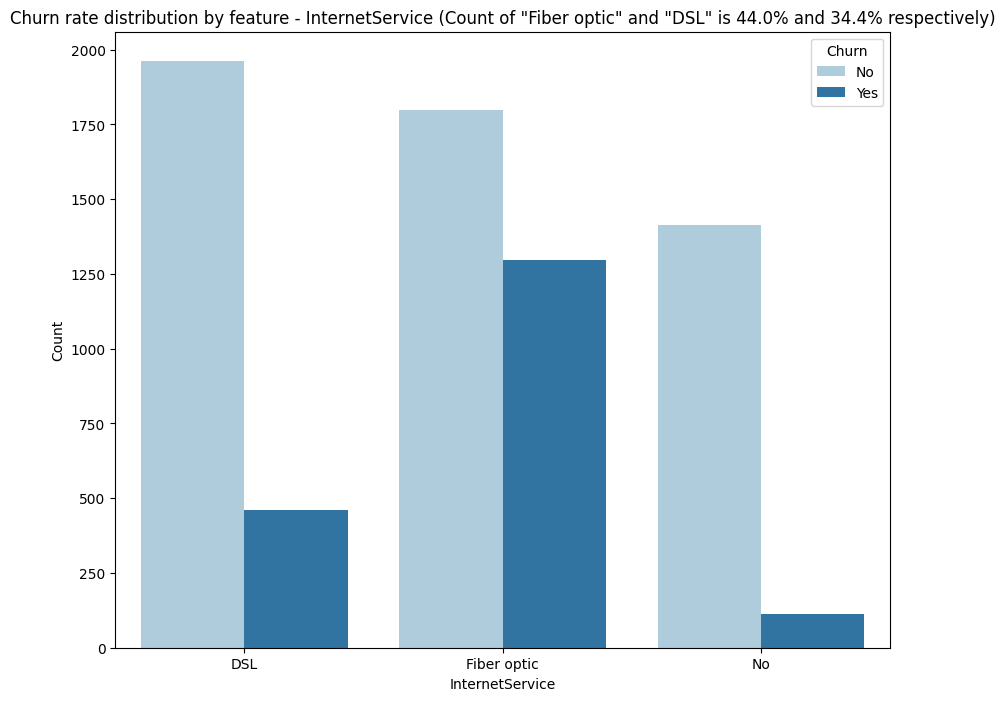

In [236]:
bar_chart('InternetService')

╒═════════════════════╤═════════╤═════════╕
│ OnlineSecurity      │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    2037 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1461 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1724 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     295 │
╘═════════════════════╧═════════╧═════════╛


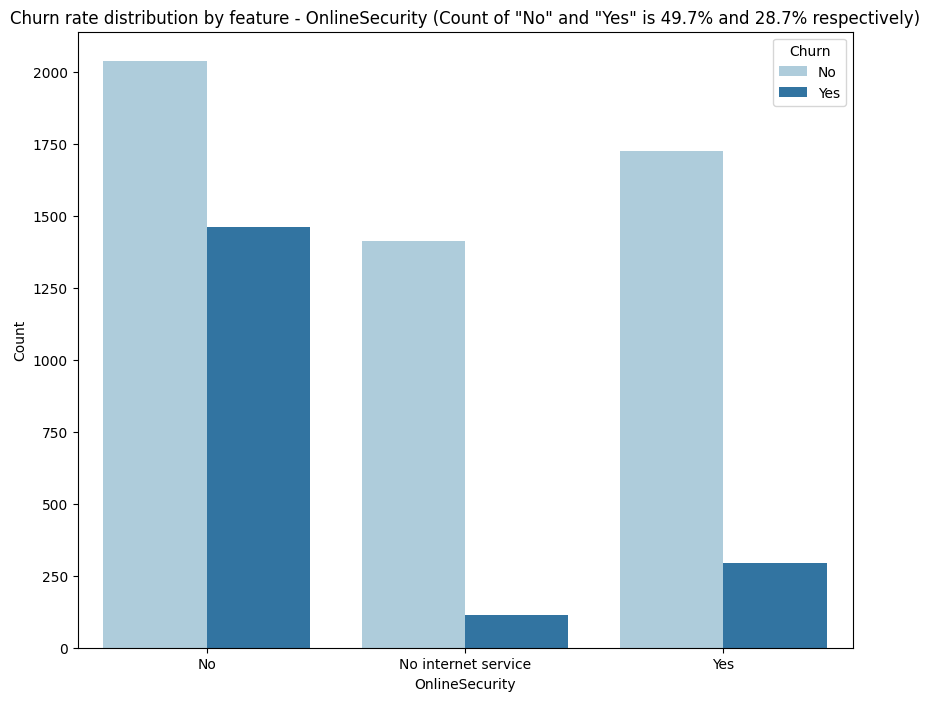

In [237]:
bar_chart('OnlineSecurity')

╒═════════════════════╤═════════╤═════════╕
│ OnlineBackup        │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1855 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1233 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1906 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     523 │
╘═════════════════════╧═════════╧═════════╛


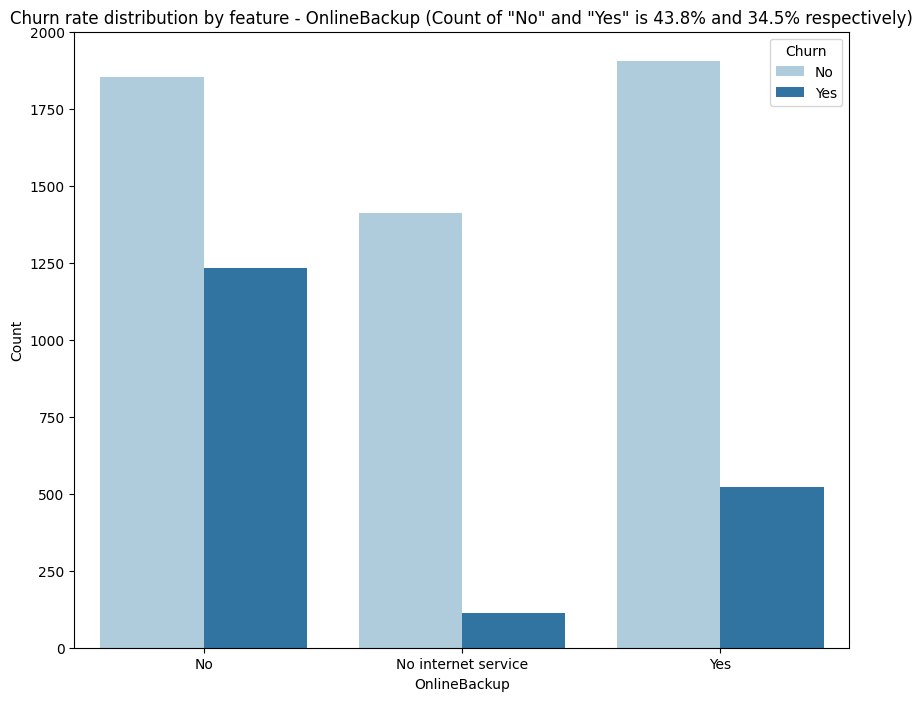

In [238]:
bar_chart('OnlineBackup')

╒═════════════════════╤═════════╤═════════╕
│ DeviceProtection    │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1884 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1211 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1877 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     545 │
╘═════════════════════╧═════════╧═════════╛


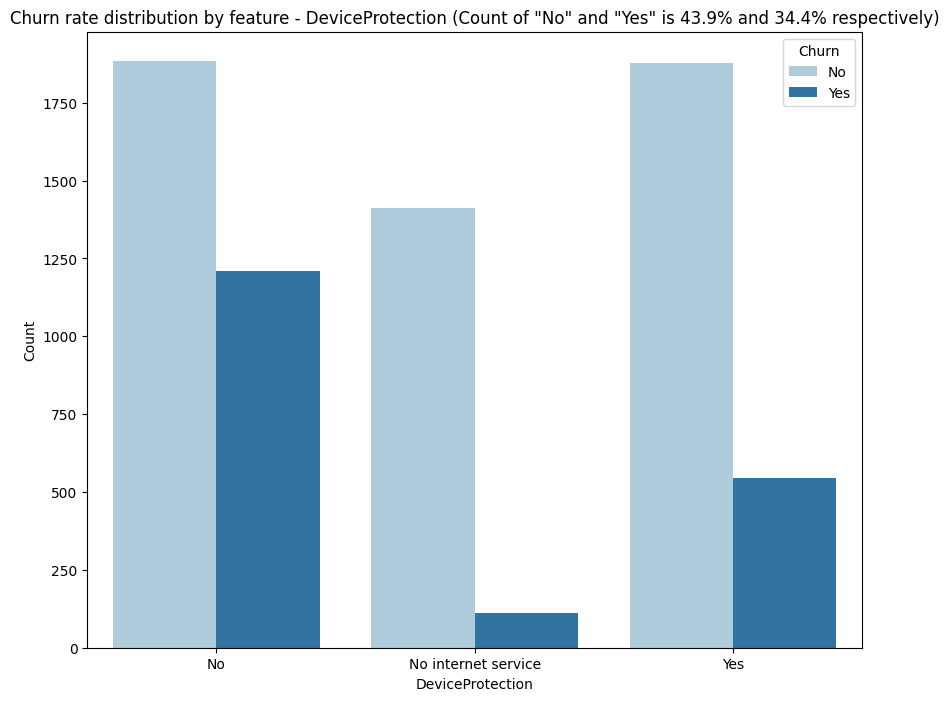

In [239]:
bar_chart('DeviceProtection')

╒═════════════════════╤═════════╤═════════╕
│ TechSupport         │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    2027 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │    1446 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1734 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     310 │
╘═════════════════════╧═════════╧═════════╛


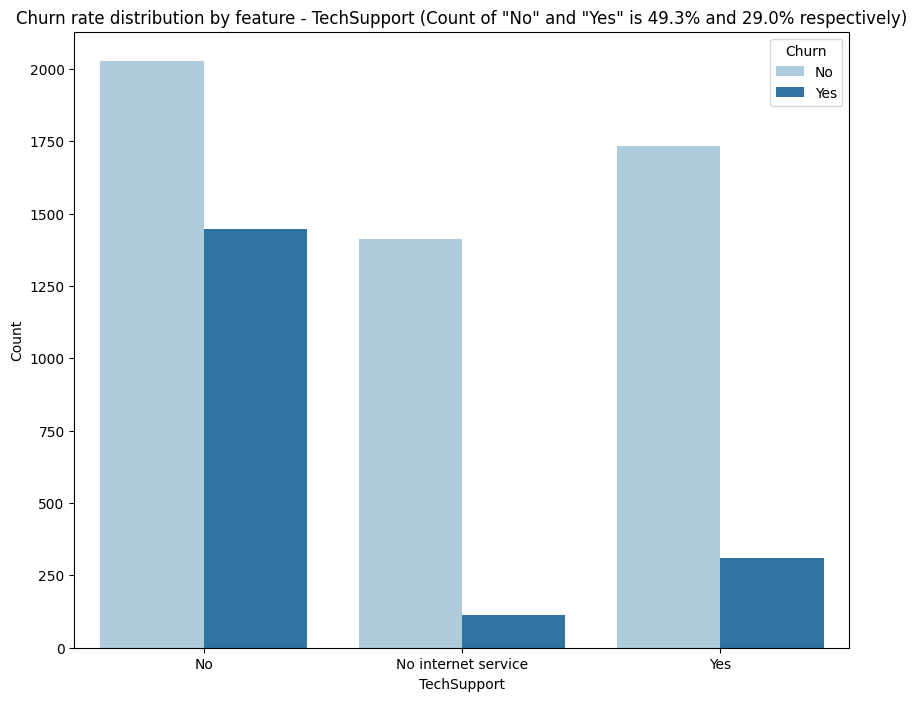

In [240]:
bar_chart('TechSupport')

╒═════════════════════╤═════════╤═════════╕
│ StreamingTV         │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1868 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │     942 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1893 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     814 │
╘═════════════════════╧═════════╧═════════╛


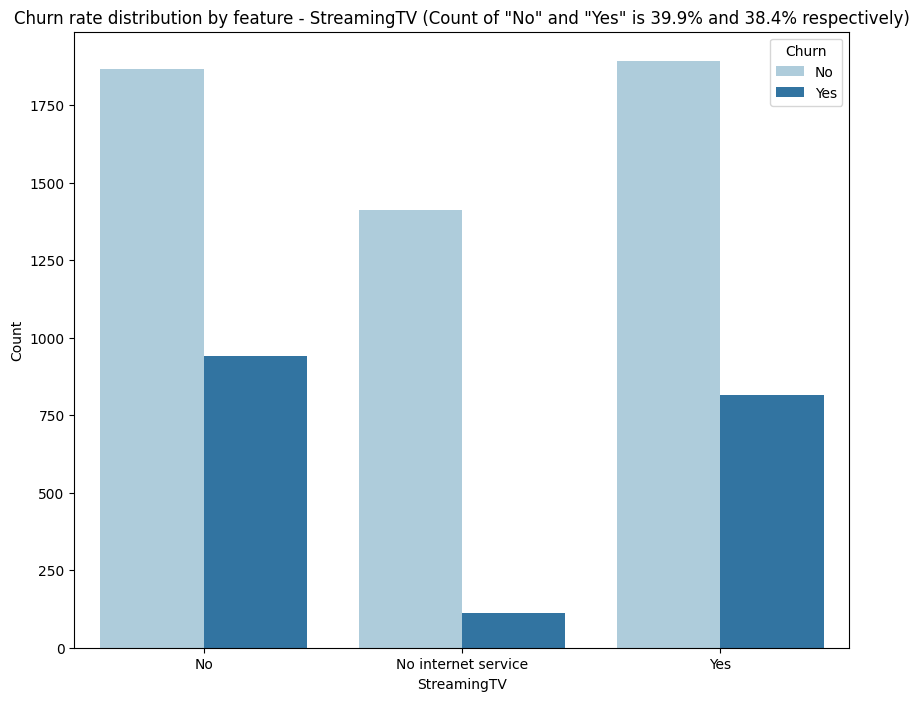

In [241]:
bar_chart('StreamingTV')

╒═════════════════════╤═════════╤═════════╕
│ StreamingMovies     │ Churn   │   Count │
╞═════════════════════╪═════════╪═════════╡
│ No                  │ No      │    1847 │
├─────────────────────┼─────────┼─────────┤
│ No                  │ Yes     │     938 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ No      │    1413 │
├─────────────────────┼─────────┼─────────┤
│ No internet service │ Yes     │     113 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ No      │    1914 │
├─────────────────────┼─────────┼─────────┤
│ Yes                 │ Yes     │     818 │
╘═════════════════════╧═════════╧═════════╛


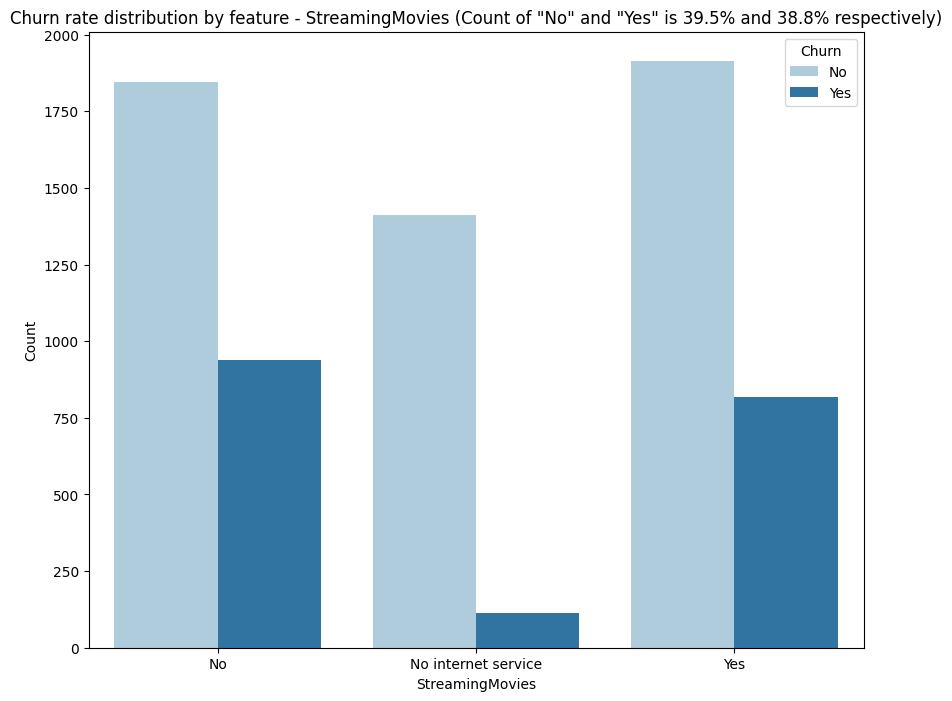

In [242]:
bar_chart('StreamingMovies')

## Insights from customer Services:
* One service metric has an effect on others. (E.g., having no phone service affects the multiple phone lines metric)
* Customers who have phone services are more likely to churn.
* Customers having fiber optic as an internet service are most likely to churn amongst customers having internet services.
* Tech support is a crucial part that has an impact on customer churn. Customers that don't avail tech support are very likely to churn. The case is similar for online security, online backup, and device protection. 
* Streaming movies and TV do not affect customer churn very much. The difference between the churn rate of customers who have TV/Movie streaming is negligible. 

### Customers with **phone service, fiber optic internet service, lack of online security, online backup, online security, tech support, and device protection** are the most likely to churn.

## Payment features

╒════════════════╤═════════╤═════════╕
│ Contract       │ Churn   │   Count │
╞════════════════╪═════════╪═════════╡
│ Month-to-month │ No      │    2220 │
├────────────────┼─────────┼─────────┤
│ Month-to-month │ Yes     │    1655 │
├────────────────┼─────────┼─────────┤
│ One year       │ No      │    1307 │
├────────────────┼─────────┼─────────┤
│ One year       │ Yes     │     166 │
├────────────────┼─────────┼─────────┤
│ Two year       │ No      │    1647 │
├────────────────┼─────────┼─────────┤
│ Two year       │ Yes     │      48 │
╘════════════════╧═════════╧═════════╛


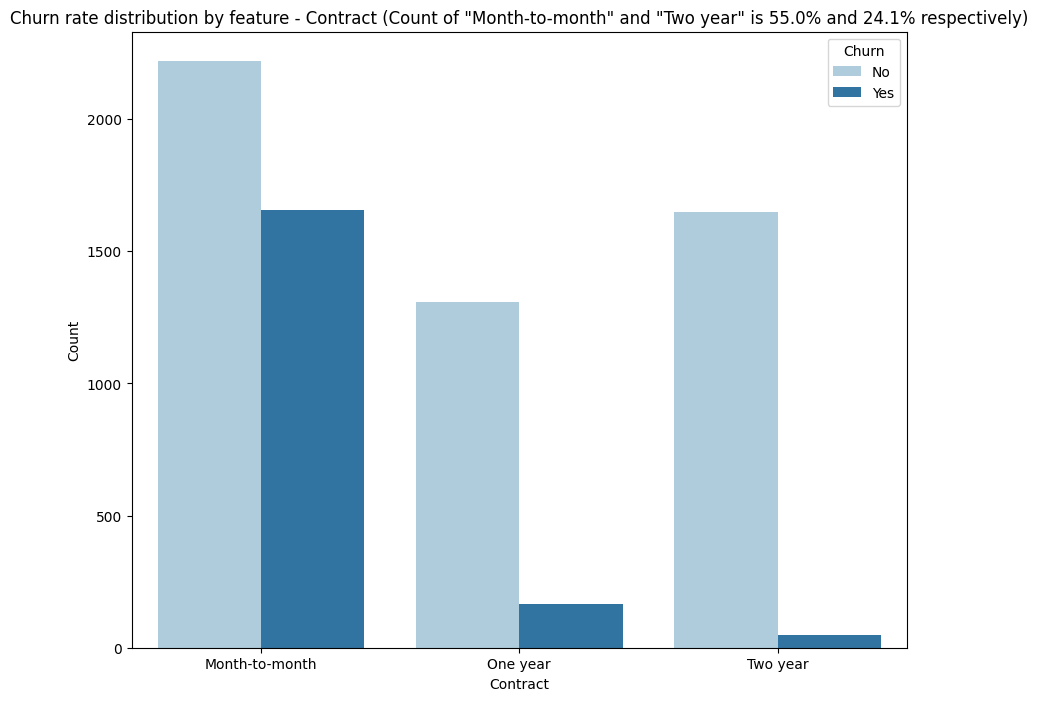

In [243]:
bar_chart('Contract')

╒════════════════════╤═════════╤═════════╕
│ PaperlessBilling   │ Churn   │   Count │
╞════════════════════╪═════════╪═════════╡
│ No                 │ No      │    2403 │
├────────────────────┼─────────┼─────────┤
│ No                 │ Yes     │     469 │
├────────────────────┼─────────┼─────────┤
│ Yes                │ No      │    2771 │
├────────────────────┼─────────┼─────────┤
│ Yes                │ Yes     │    1400 │
╘════════════════════╧═════════╧═════════╛


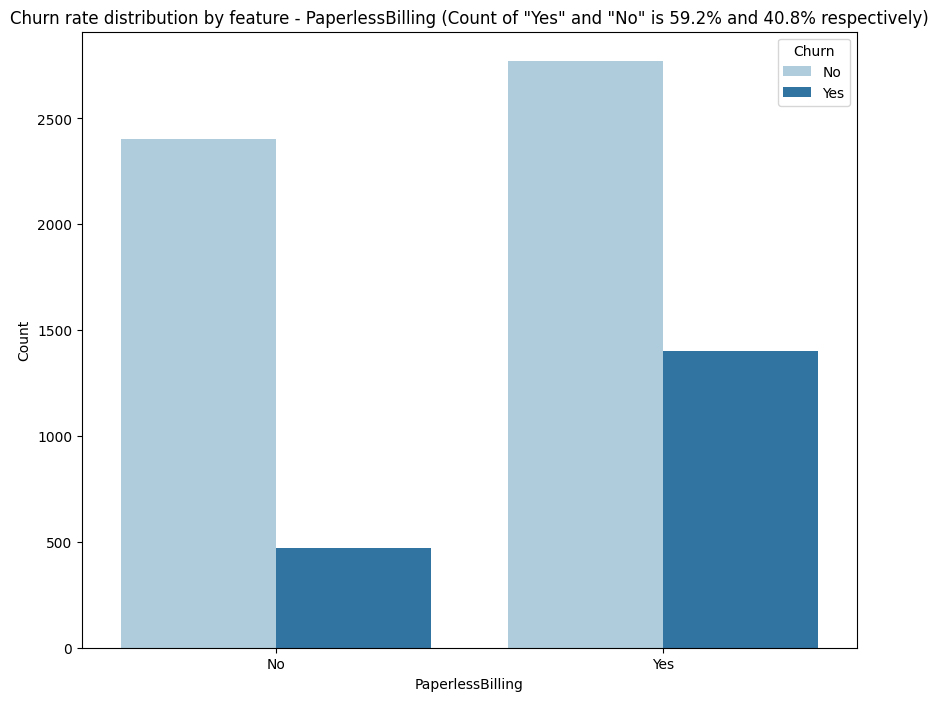

In [244]:
bar_chart('PaperlessBilling')

╒═══════════════════════════╤═════════╤═════════╕
│ PaymentMethod             │ Churn   │   Count │
╞═══════════════════════════╪═════════╪═════════╡
│ Bank transfer (automatic) │ No      │    1286 │
├───────────────────────────┼─────────┼─────────┤
│ Bank transfer (automatic) │ Yes     │     258 │
├───────────────────────────┼─────────┼─────────┤
│ Credit card (automatic)   │ No      │    1290 │
├───────────────────────────┼─────────┼─────────┤
│ Credit card (automatic)   │ Yes     │     232 │
├───────────────────────────┼─────────┼─────────┤
│ Electronic check          │ No      │    1294 │
├───────────────────────────┼─────────┼─────────┤
│ Electronic check          │ Yes     │    1071 │
├───────────────────────────┼─────────┼─────────┤
│ Mailed check              │ No      │    1304 │
├───────────────────────────┼─────────┼─────────┤
│ Mailed check              │ Yes     │     308 │
╘═══════════════════════════╧═════════╧═════════╛


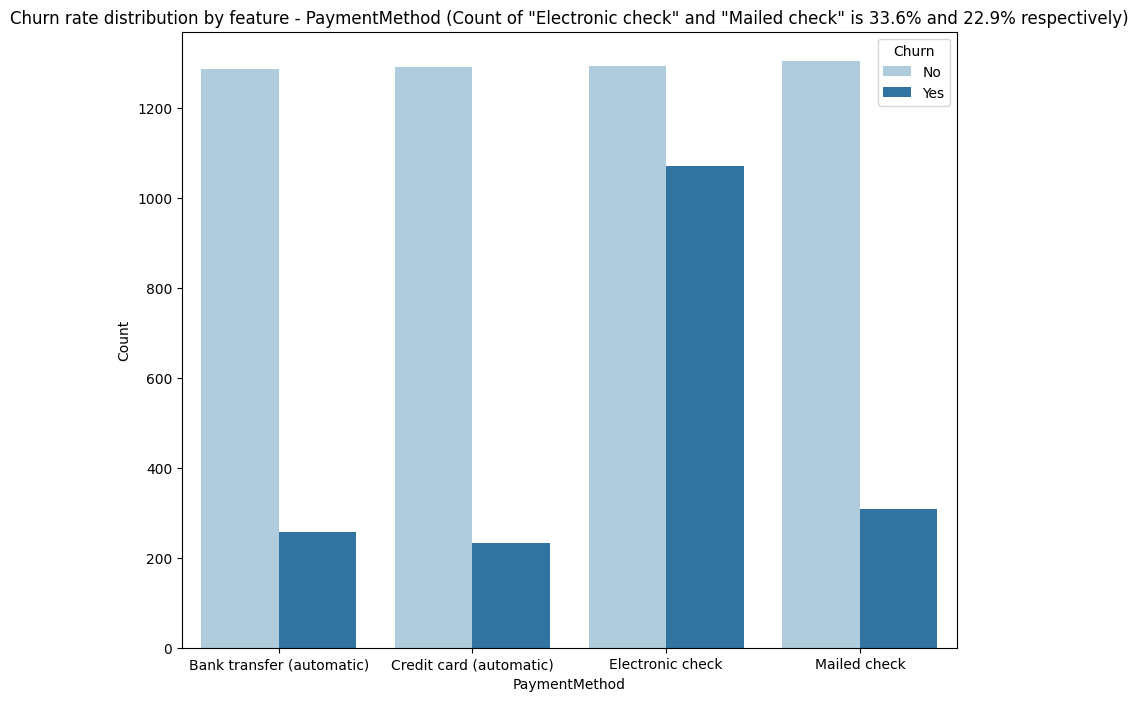

In [245]:
bar_chart('PaymentMethod')

## Payment feature insights:
* On average, the shorter the contract period, the higher the possibility of churn. This could be because of a high barrier to cancel when opting for long term contract options. 
* Churn rate is quite high for customers who use paperless billing. Similarily, the churn rate is highest for customers who pay using electronic checks.

### Customers who have **short contract periods, paperless billing, and pay using electronic cheques** are the most likely to churn. 